# P3

# 1.The data

In [31]:
import pandas as pd
import numpy as np

## 1.1 Load the data

In [3]:
data_body = pd.read_csv('soc-redditHyperlinks-body.tsv', sep = '\t')
data_title = pd.read_csv('soc-redditHyperlinks-title.tsv', sep = '\t')
data_body.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."


In [5]:
data_title.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,rddtgaming,rddtrust,1u4pzzs,2013-12-31 16:39:18,1,"25.0,23.0,0.76,0.0,0.44,0.12,0.12,4.0,4.0,0.0,..."
1,xboxone,battlefield_4,1u4tmfs,2013-12-31 17:59:11,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
2,ps4,battlefield_4,1u4tmos,2013-12-31 17:59:40,1,"100.0,88.0,0.78,0.02,0.08,0.13,0.07,16.0,16.0,..."
3,fitnesscirclejerk,leangains,1u50xfs,2013-12-31 19:01:56,1,"49.0,43.0,0.775510204082,0.0,0.265306122449,0...."
4,fitnesscirclejerk,lifeprotips,1u51nps,2013-12-31 21:02:28,1,"14.0,14.0,0.785714285714,0.0,0.428571428571,0...."


**Create the dataframe containing body + title links**

In [6]:
data_total = pd.concat([data_body,data_title], ignore_index = True)
print('Data total .{}'.format(data_total.shape))
print('Data body .{}'.format(data_body.shape))
print('Data title .{}'.format(data_title.shape))


Data total .(858488, 6)
Data body .(286561, 6)
Data title .(571927, 6)


In [7]:
data_total.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08..."
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049..."
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082..."
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0...."
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0...."


**Note :** number of ligne (posts) in body : 286561
number of ligne (posts) in title : 571927
total number : 858488 = 286561 + 571927, so there is nothing in double in the 2 datasets

## 1.2 Count the number of nodes and edges

### Code

In [8]:
table = pd.DataFrame(columns = ['body', 'title', 'total'], index = ['Nodes', 'Edges', '+ edges', '- edges', 'Triads'])

nb_edges_body = data_body.shape[0]
nb_nodes_body = np.unique(np.concatenate((data_body['SOURCE_SUBREDDIT'].values , data_body['TARGET_SUBREDDIT'].values))).shape[0]

nb_edges_title = data_title.shape[0]
nb_nodes_title = np.unique(np.concatenate((data_title['SOURCE_SUBREDDIT'].values , data_title['TARGET_SUBREDDIT'].values))).shape[0]

nb_edges_total = data_total.shape[0]
nb_nodes_total = np.unique(np.concatenate((data_total['SOURCE_SUBREDDIT'].values , data_total['TARGET_SUBREDDIT'].values))).shape[0]


table.loc['Nodes'] = [nb_nodes_body, nb_nodes_title, nb_nodes_total]
table.loc['Edges'] = [nb_edges_body, nb_edges_title, nb_edges_total]

table.head()

,body,title,total
Nodes,35776,54075,67180
Edges,286561,571927,858488
+ edges,NaN,NaN,NaN
- edges,NaN,NaN,NaN
Triads,NaN,NaN,NaN


### Discussion

## 1.3 Count the proprtion of positives edges

 ### Code


In [9]:
#Number of positive (negative) edges :
#We first filter the data by keeping only +1 (or -1) values and then we find the number of lines (edges) that this filtering gives
nb_pos_edges_body = data_body[data_body['LINK_SENTIMENT']==1].shape[0] 
nb_neg_edges_body = data_body[data_body['LINK_SENTIMENT']==-1].shape[0]

nb_pos_edges_title = data_title[data_title['LINK_SENTIMENT']==1].shape[0] 
nb_neg_edges_title= data_title[data_title['LINK_SENTIMENT']==-1].shape[0]

nb_pos_edges_total = data_total[data_total['LINK_SENTIMENT']==1].shape[0] 
nb_neg_edges_total = data_total[data_total['LINK_SENTIMENT']==-1].shape[0]

#Proportion of positive/negative edges:
#We divide the number of positive (or negative) edges previouly found and divide it by the total number of edges
#We use the table1 to find the total number of edges as we already filled these informations
perc_pos_body = nb_pos_edges_body / table.loc['Edges']['body']
perc_neg_body = nb_neg_edges_body / table.loc['Edges']['body']

perc_pos_title = nb_pos_edges_title / table.loc['Edges']['title']
perc_neg_title = nb_neg_edges_title / table.loc['Edges']['title']

perc_pos_total = nb_pos_edges_total / table.loc['Edges']['total']
perc_neg_total = nb_neg_edges_total / table.loc['Edges']['total']

In [10]:
#We must indicate a percentage format : we use the {:.1%} format to have a percentage with only one decimal, as in the paper 
table.loc['+ edges'] = ['{:.1%}'.format(perc_pos_body), '{:.1%}'.format(perc_pos_title), '{:.1%}'.format(perc_pos_total)]
table.loc['- edges'] = ['{:.1%}'.format(perc_neg_body), '{:.1%}'.format(perc_neg_title), '{:.1%}'.format(perc_neg_total)]

table.head()

,body,title,total
Nodes,35776,54075,67180
Edges,286561,571927,858488
+ edges,92.6%,89.3%,90.4%
- edges,7.4%,10.7%,9.6%
Triads,NaN,NaN,NaN


### Discussion

**ANALYSIS :**
here we see +edges % is around 90 % (89.3 for hte title and 92.6% for the body). 
It is higher than the results for the 3 other datasets : Epinions (85%), Slashdot (77.4%) and Wiki (78.7%). 
/!\ Have to take into account in further analysis ! 

In [11]:
#table['remove'] = [1,2,3,0,0]
#table.head()

In [12]:
#Remove some lines with positive link to have 80%**

In [13]:
#data_remove = pd.concat((data_total[data_total['LINK_SENTIMENT']==-1], data_total[data_total['LINK_SENTIMENT']==1].head(329660)))

#nb_edges_remove = data_remove.shape[0]
#nb_nodes_remove = np.unique(np.concatenate((data_remove['SOURCE_SUBREDDIT'].values , data_remove['TARGET_SUBREDDIT'].values))).shape[0]

#nb_pos_edges_remove = data_remove[data_remove['LINK_SENTIMENT']==1].shape[0] 
#nb_neg_edges_remove = data_remove[data_remove['LINK_SENTIMENT']==-1].shape[0]

#perc_pos_remove = nb_pos_edges_remove / nb_edges_remove
#perc_neg_remove = nb_neg_edges_remove / nb_edges_remove

#table['remove'] = [nb_nodes_remove, nb_edges_remove, '{:.1%}'.format(perc_pos_remove), '{:.1%}'.format(perc_neg_remove), 0]
#table.head()

# Analysis of Time 

## Analyzing the global trend 

**NOTE FOR PART 2** : On the following analysis we will only consider the body dataset from reddit. As we will use sentiment score, it seams more relevant to use the one computed from a text than from a single title as it will be more nuanced and thus will represent better the overall idea of the post. 

## Global pathway of the analysis --------------------------------------------------------------------------- 

1) Work on the Reddit dataset
- step 0 : work with datetime data
- step 1 : analysis of the year 
- step 2 : analysis of the month 
- step 3 : analysis of the day of the month and of the week 
- step 4 : analyis of the hour 

Aim : identify the main trends among the time data, and thus define new subgraphs

2) Do the structural analysis of these subgraphs 
Parameters : Centrality, Clustering, Behavior
3) First conclusion

4) Work on the wikipedia and slashdot dataset
- same steps 0, 1, 2, 3, 4
Aim : identify the main trends among the time data, and thus define new subgraphs

5) Do the structural analysis of these second subgraphs 
Parameters : Centrality, Clustering, Behavior

6) Second Conclusion

7) Draw the scheme of a situation, to illustrate how the time can influence the formation of new edges compared to status and balance theory. (Abstract, with a drawing)

## -----------------------------------------------------------------------------------------------------------------------------

## 1) Work on the Reddit dataset
### **Step 0**  : Work with datetime data

In [30]:
print('Exemple : the date of the first post of the dataset is : {}'.format(data_body['TIMESTAMP'][3]))
print(' Its type is ',type(data_body['TIMESTAMP'][3]))

Exemple : the date of the first post of the dataset is : 2013-12-31 17:37:55
 Its type is  <class 'str'>


Here the date are strings, so we need to convert them into datetime form as we want to do time manipulation (e.g. year example). 

In [33]:
# Useful libraries 
from datetime import datetime, date, time
import calendar 

In [34]:
# create the new column in the dataframe
data_body['DATETIME'] = 0.0
data_body.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES,DATETIME
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08...",0.0
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049...",0.0
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082...",0.0
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0....",0.0
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0....",0.0


In [35]:
# fill this new column with the datetime content
for i in range(0, len(data_body)):
    data_body['DATETIME'][i] = datetime.strptime(data_body['TIMESTAMP'][0], "%Y-%m-%d %H:%M:%S")
data_body.head()

<ipython-input-35-508a6d45eb1c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_body['DATETIME'][i] = datetime.strptime(data_body['TIMESTAMP'][0], "%Y-%m-%d %H:%M:%S")
/home/laurine/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES,DATETIME
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08...",2013-12-31 16:39:58
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049...",2013-12-31 16:39:58
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082...",2013-12-31 16:39:58
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0....",2013-12-31 16:39:58
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0....",2013-12-31 16:39:58


In [73]:
data_body['DATETIME2'] = pd.to_datetime(data_body['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [74]:
data_body.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES,DATETIME,DATETIME2
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08...",2013-12-31 16:39:58,2013-12-31 16:39:58
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049...",2013-12-31 16:39:58,2013-12-31 18:18:37
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082...",2013-12-31 16:39:58,2014-01-01 14:54:35
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0....",2013-12-31 16:39:58,2013-12-31 17:37:55
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0....",2013-12-31 16:39:58,2014-01-01 02:51:13


In [75]:
print(type(data_body['DATETIME2'][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [67]:
data_body['DATETIME'] = data_body['DATETIME'].dropna()

**Split the dataset into positive and negative edges**

*Positif*

In [229]:
body_pos = data_body.copy()
body_pos = body_pos.drop(body_pos[body_pos.LINK_SENTIMENT == -1.0].index).reset_index(drop=True)
print('data body original .{}'.format(data_body.shape))
print('body POS {}'.format(body_pos.shape))

data body original .(286561, 8)
body POS (265491, 8)


In [230]:
print('In data body : sign of post 4 = ', data_body.iloc[1][4])
print('In body pos : sign of post 4 = ', body_pos.iloc[1][4])

In data body : sign of post 4 =  -1
In body pos : sign of post 4 =  1


In [231]:
body_pos.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES,DATETIME,DATETIME2
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08...",2013-12-31 16:39:58,2013-12-31 16:39:58
1,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082...",2013-12-31 16:39:58,2014-01-01 14:54:35
2,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0....",2013-12-31 16:39:58,2013-12-31 17:37:55
3,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0....",2013-12-31 16:39:58,2014-01-01 02:51:13
4,dogemarket,dogecoin,1u4w7bs,2013-12-31 18:35:44,1,"1328.0,1110.0,0.768825301205,0.0143072289157,0...",2013-12-31 16:39:58,2013-12-31 18:35:44


*Negatif*

In [237]:
body_neg = data_body.copy()
body_neg= body_neg.drop(body_neg[body_neg.LINK_SENTIMENT == 1.0].index).reset_index(drop=True)
print('data body original .{}'.format(data_body.shape))
print('body NEG {}'.format(body_neg.shape))

data body original .(286561, 8)
body NEG (21070, 8)


In [238]:
print('In data body : sign of post 4 = ', data_body.iloc[0][4])
print('In body pos : sign of post 4 = ', body_neg.iloc[0][4])

In data body : sign of post 4 =  1
In body pos : sign of post 4 =  -1


In [239]:
body_neg.head()

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES,DATETIME,DATETIME2
0,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049...",2013-12-31 16:39:58,2013-12-31 18:18:37
1,karmaconspiracy,funny,1u6fz3,2014-01-01 12:44:19,-1,"186.0,182.0,0.741935483871,0.0376344086022,0.0...",2013-12-31 16:39:58,2014-01-01 12:44:19
2,badkarma,gamesell,1u6t4g,2014-01-01 16:42:14,-1,"262.0,258.0,0.725190839695,0.0381679389313,0.0...",2013-12-31 16:39:58,2014-01-01 16:42:14
3,casualiama,teenagers,1u70s8,2014-01-01 17:09:46,-1,"91.0,91.0,0.78021978022,0.032967032967,0.04395...",2013-12-31 16:39:58,2014-01-01 17:09:46
4,australia,sydney,1u71zd,2014-01-01 17:24:46,-1,"2547.0,2158.0,0.801334903808,0.0051040439733,0...",2013-12-31 16:39:58,2014-01-01 17:24:46


### Step 1 : Analysis of the year

In [240]:
import matplotlib.pyplot as plt

In [241]:
# verify the type of data time 
print(type(data_body.DATETIME2[0]))
print(type(body_pos.DATETIME2[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [291]:
# Just to have an idea of what it'll look like. 
year_positive = body_pos.groupby(data_body['DATETIME2'].dt.year).size()
year_negative = body_neg.groupby(data_body['DATETIME2'].dt.year).size()

print('Year Positive', year_positive)
print('Year Negative', year_negative)

Year Positive DATETIME2
2013        7
2014    63342
2015    88572
2016    98167
2017    15403
dtype: int64
Year Negative DATETIME2
2013        7
2014    21038
2015       20
2016        4
2017        1
dtype: int64


So there are 5 years presented in the dataset : 2013, 2014, 2015, 2016 and 2017. 

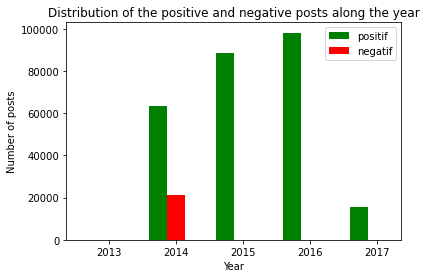

In [293]:
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

 
year_pos = body_pos.groupby(data_body['DATETIME2'].dt.year).size()
rects1 = ax.bar(ind, year_pos, width, color='g')
year_neg = body_neg.groupby(data_body['DATETIME2'].dt.year).size()

rects2 = ax.bar(ind+width, year_neg, width, color='r')

ax.set_ylabel('Number of posts')
ax.set_xlabel('Year')
ax.set_title('Distribution of the positive and negative posts along the year')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2013', '2014', '2015', '2016', '2017') )
ax.legend( (rects1[0], rects2[0]), ('positif', 'negatif') )

plt.show()

**Analysis :** 
- the number of post in 2013 is inexistant on the graph

In [294]:
print('The number of positive posts in 2013 is ', year_pos.iloc[0])
print('The number of negative posts in 2013 is ', year_neg.iloc[0])
print('So the total number of posts in 2013 is {} while in 2016 it is {}'.format(year_pos.iloc[0]+year_neg.iloc[0], vals_pos.iloc[3]+year_neg.iloc[3]))

print('The number of positive posts in 2015 is {}, in 2016 is {} and in 2017 is {}'.format(year_neg.iloc[2], year_neg.iloc[3], year_neg.iloc[4]))

The number of positive posts in 2013 is  7
The number of negative posts in 2013 is  7
So the total number of posts in 2013 is 14 while in 2016 it is 90823
The number of positive posts in 2015 is 20, in 2016 is 4 and in 2017 is 1


- As we can see here, it might come from a problem of scale, as sometimes even if the amount of post is not null, no bar appear.The total amount of posts (positive and negative) during 2013 is very very small compared to the number of posts 2016. It is the same for the 2015 2016 and 2017 for the negative posts that don't appear, even if when we are calling the numbers they do exists. Their value is too small compared to the value of negative posts in 2014 to be seen on a graph, even when plotted alone. The small amount of posts in 2013 could be explained by the gain of popularity of the website, or the change in behavior of the population (who is more and more connected via internet and social network, and have better access to technology). The big amount of negative votes might comes from an external events. 

- the brutal decrease in 2017 in both positive and negative edges might be explained by loose of popularity, or the apparition of another website more performant than reddit. 

To be able to identify the trend among the year, we compute the ratio of neg/pos*100. 

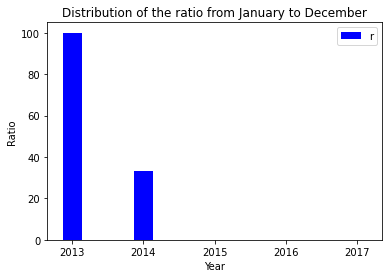

In [323]:
ratio = [(int(b) / int(m))*100 for b,m in zip(year_neg, year_pos)]
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)


rects1 = ax.bar(ind, ratio, width, color='b')
ax.set_ylabel('Ratio')
ax.set_xlabel('Year')
ax.set_title('Distribution of the ratio from January to December')
ax.set_xticks(ind)
ax.set_xticklabels( ('2013', '2014', '2015', '2016', '2017'))
ax.legend('ratio neg/pos*100')

plt.show()

- So here we see 3 parts : 2013 (lot of negative votes), 2014 (almost 50% 50%) and 2015-2016-2017 (almost no negative votes. 
- As we are doing this in order to compare the structure of the subnetworks, it will be easier if the networks are really different. So between 2015 2016 and 2017 we will choose 2016 as it is the year with the higher amount of positive votes, the negatives ones being quite constant along these 3 years. 
- in 2013 as we have seen there are only 7 positive and 7 negatives votes. So it is too small network to do an analysis. 

**Ccl :** In order to assess the impact of the **YEAR** on the structure of the network, we can compare 2 subgraphs : 
> - from the year 2014
> - from the year 2016

### Step 2: Analysis of the month 

In [290]:
month_positive = body_pos.groupby(data_body['DATETIME2'].dt.month).size()
month_negative = body_neg.groupby(data_body['DATETIME2'].dt.month).size()
print('Month Positive', month_positive)
print('Month Negative', month_negative)

Month Positive DATETIME2
1     28143
2     25743
3     21491
4     20343
5     20469
6     21184
7     22312
8     23195
9     19522
10    21067
11    20528
12    21494
dtype: int64
Month Negative DATETIME2
1     4422
2     4425
3     5363
4     4980
5     1822
6        9
7       12
8        3
9        3
10       1
11      19
12      11
dtype: int64


So 12 months are represented : 01 ... 12 in the dataset. 

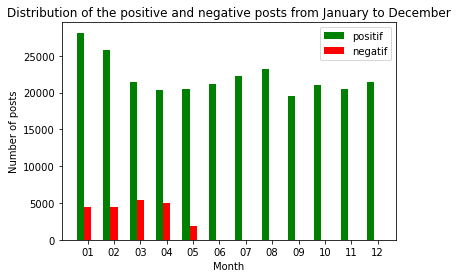

In [252]:
N = 12
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

 
month_pos = body_pos.groupby(data_body['DATETIME2'].dt.month).size()
rects1 = ax.bar(ind, month_pos, width, color='g')
month_neg = body_neg.groupby(data_body['DATETIME2'].dt.month).size()
rects2 = ax.bar(ind+width, month_neg, width, color='r')

ax.set_ylabel('Number of posts')
ax.set_xlabel('Month')
ax.set_title('Distribution of the positive and negative posts from January to December')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'))
ax.legend( (rects1[0], rects2[0]), ('positif', 'negatif') )

plt.show()

**Analysis :**
- All the month do have posts
- The difference between the number of positive and negative posts is huge, all along the year and depsite intern fluctation
- The number of negative posts is higher at the beginning of the year (01-05) than at the end of the year (06-12)
- So we can identify to main part on the graph : when we have both green and red barplots (01-50) and when we don't have green and red. 
- Also we can identify 2 main values of counts : around 20 000 and around 25 000 
 

First compute the ration of positive and negative posts, to se if it is quite constant or not. 

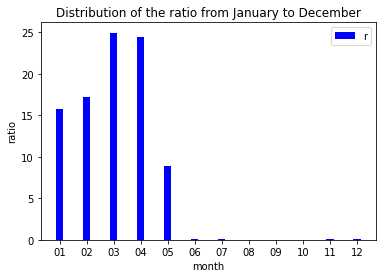

In [325]:
ratio = [(int(b) / int(m))*100 for b,m in zip(month_neg, month_pos)]
N = 12
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)


rects1 = ax.bar(ind, ratio, width, color='b')
ax.set_ylabel('ratio')
ax.set_xlabel('month')
ax.set_title('Distribution of the ratio from January to December')
ax.set_xticks(ind)
ax.set_xticklabels( ('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'))
ax.legend('ratio neg/pos*100')

plt.show()

- So here we have 3 parts : 01-02-05 with ratio between 10 and 15, 03-04 with ratio around 25 and 06-->12 with ratio very very small. So we'll pick one month representing each of this part to continue the analysis. 

In [153]:
import statistics

In [326]:
# 01 - 02 - 05 
mean_010205_pos = statistics.mean([month_pos.iloc[0], month_pos.iloc[1], month_pos.iloc[4]])
print('The mean count of posts from jan. to apr. is ', mean_010205_pos)
print('The difference between number of counts and mean for january, february and may is respectively: \n',[abs(x - mean_010205_pos) for x in [month_pos.iloc[0], month_pos.iloc[1], month_pos.iloc[4]]])

The mean count of posts from jan. to apr. is  24785
The difference between number of counts and mean for january, february and may is respectively: 
 [3358, 958, 4316]


So we see that the average value of positive post between january, february and may is 24785. We also see that the month with the number of counts the closer to this mean is february (it as the small difference, 358) and thus the more representative.

In [329]:
# 03 - 04 
mean_0304_pos = statistics.mean([month_pos.iloc[2], month_pos.iloc[3]])
print('The mean count of posts from jan. to apr. is ', mean_0304_pos)
print('The difference between number of counts and mean for march and april is respectively: \n',[abs(x - mean_0304_pos) for x in [month_pos.iloc[2], month_pos.iloc[3]]])

The mean count of posts from jan. to apr. is  20917
The difference between number of counts and mean for march and april is respectively: 
 [574, 574]


So we see that the average number of positive counts between march and april is 20917. We also see that both are at equal distance to the mean. We will choose march because it has a high number of votes and thus might be more rich in the further analysis. 

In [330]:
# 06 - 12 
# 03 - 04 
mean_0612_pos = statistics.mean([month_pos.iloc[5], month_pos.iloc[6], month_pos.iloc[7], month_pos.iloc[8], month_pos.iloc[9], month_pos.iloc[10], month_pos.iloc[11]])
print('The mean count of posts from jan. to apr. is ', mean_0612_pos)
print('The difference between number of counts and mean for march and april is respectively: \n',[abs(x - mean_0612_pos) for x in [month_pos.iloc[5], month_pos.iloc[6], month_pos.iloc[7], month_pos.iloc[8], month_pos.iloc[9], month_pos.iloc[10], month_pos.iloc[11]]])


The mean count of posts from jan. to apr. is  21328
The difference between number of counts and mean for march and april is respectively: 
 [144, 984, 1867, 1806, 261, 800, 166]


So we see that the average number of positive edges between march and april is 21328. We also see that the month closer to this average is june (difference smaller, 144) and thus it is the more representative.

**Ccl :** In order to assess the impact of the **MONTH** on the structure of the network, we can compare 2 subgraphs : 
> - from february (representative of the first group - ratio 10 -)
> - from march (representative of the second group, -ratio 25-)
> - from june (representative of the third group, -ration almost null)

### Step 3: Analysis of the day

In [288]:
day_positive = body_pos.groupby(data_body['DATETIME2'].dt.day).size()
day_negative = body_neg.groupby(data_body['DATETIME2'].dt.day).size()
print('Month Positive', day_positive)
print('Month Negative', day_negative)

Month Positive DATETIME2
1     8535
2     9120
3     8966
4     8436
5     8690
6     8941
7     8561
8     8572
9     8645
10    8825
11    9029
12    8810
13    8715
14    8367
15    8887
16    9349
17    9153
18    8787
19    8666
20    9198
21    8516
22    8610
23    8393
24    8400
25    8424
26    8318
27    8778
28    8299
29    8217
30    8236
31    5048
dtype: int64
Month Negative DATETIME2
1     671
2     764
3     777
4     773
5     742
6     909
7     770
8     806
9     767
10    797
11    855
12    625
13    631
14    618
15    628
16    692
17    738
18    617
19    637
20    603
21    586
22    640
23    640
24    691
25    683
26    630
27    659
28    664
29    561
30    531
31    365
dtype: int64


So we see that all the 31 days of a month are represented in the dataset. 

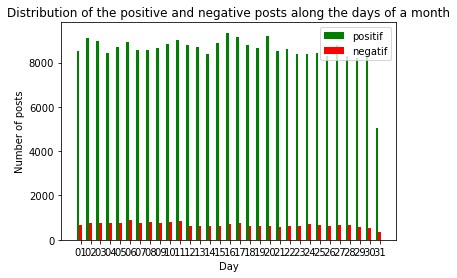

In [263]:
N = 31
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

 
day_pos = body_pos.groupby(data_body['DATETIME2'].dt.day).size()
rects1 = ax.bar(ind, day_pos, width, color='g')
day_neg = body_neg.groupby(data_body['DATETIME2'].dt.day).size()
rects2 = ax.bar(ind+width, day_neg, width, color='r')

ax.set_ylabel('Number of posts')
ax.set_xlabel('Day')
ax.set_title('Distribution of the positive and negative posts along the days of a month')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26' ,'27', '28', '29', '30', '31'))
ax.legend((rects1[0], rects2[0]), ('positif', 'negatif'))

plt.show()

**Analysis :** 
- graph not very lisible (**Change the size ?**)
- the abrupt decrease for day 31 is because only half of the month in a year have a 31th day, so obviously there are less posts (pos and neg) done that day
- the amount of positive post is very small compared to amount of positif posts, for all the days 
- General manner : both positive and negative counts seams to be relatively constant along the days of a month, they are some fluctuations (more visible for positive posts) but it is hard to highlight clear trend. 

**Ccle :** We need to do further analysis on the days to be able to identify trends. So we are going to look at the number of posts according to the day of the weem: monday, tuesday ... sunday. 

Compute the ratio

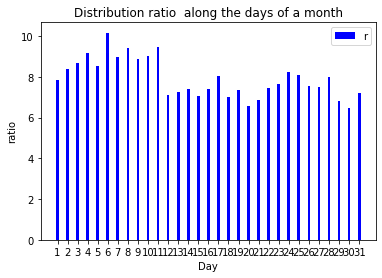

In [338]:
ratio = [(int(b) / int(m))*100 for b,m in zip(day_neg, day_pos)]
N = 31
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, ratio, width, color='b')

ax.set_ylabel('ratio')
ax.set_xlabel('Day')
ax.set_title('Distribution ratio  along the days of a month')
ax.set_xticks(ind)
ax.set_xticklabels( ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26' ,'27', '28', '29', '30', '31'))
ax.legend('ratio')
plt.show()

- still hard to identify a trend. Have to look on the day og the week to try to identify pattern

#### Step 3 : cont. Analysis day of the week

In [289]:
day_positive = body_pos.groupby(data_body['DATETIME2'].dt.weekday).size()
day_negative = body_neg.groupby(data_body['DATETIME2'].dt.weekday).size()
print('Month Positive', day_positive)
print('Month Negative', day_negative)

Month Positive DATETIME2
0    40390
1    40945
2    40052
3    39617
4    37373
5    32527
6    34587
dtype: int64
Month Negative DATETIME2
0    3101
1    3458
2    3145
3    3123
4    2956
5    2542
6    2745
dtype: int64


So the days reprensented in the dataset are from 0 (monday) to 6 (sunday). 

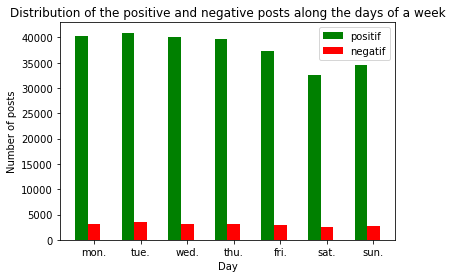

In [343]:
N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

 
dayw_pos = body_pos.groupby(data_body['DATETIME2'].dt.weekday).size()
rects1 = ax.bar(ind, dayw_pos, width, color='g')
dayw_neg = body_neg.groupby(data_body['DATETIME2'].dt.weekday).size()
rects2 = ax.bar(ind+width, dayw_neg, width, color='r')

ax.set_ylabel('Number of posts')
ax.set_xlabel('Day')
ax.set_title('Distribution of the positive and negative posts along the days of a week')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('mon.', 'tue.', 'wed.', 'thu.', 'fri.', 'sat.', 'sun.'))
ax.legend((rects1[0], rects2[0]), ('positif', 'negatif'))

plt.show()

**Analysis :**
- As for the other parameter (year, month, day of the month), the amount of positive posts is higher than the amount of negative posts
- The amount of negative posts is quite constant along the week 
- the amount of positive posts is smaller the week end, and quite constant during the week. It might be explained by the routine of the week, so the habits of beeing on the website for coffe break for example, while the week end, the events are more random and technology connection can be smaller. 


Compute the ratio to ensure this analysis

[7.677642980935875, 8.445475638051043, 7.852292020373515, 7.882979528990081, 7.909453348674177, 7.815045961816337, 7.936507936507936]


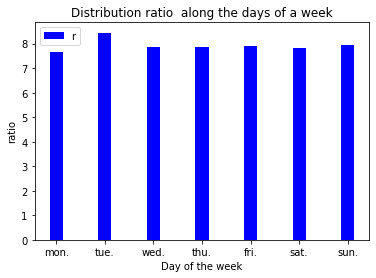

In [340]:
ratio = [(int(b) / int(m))*100 for b,m in zip(dayw_neg, dayw_pos)]
print(ratio)
N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, ratio, width, color='b')

ax.set_ylabel('ratio')
ax.set_xlabel('Day of the week')
ax.set_title('Distribution ratio  along the days of a week')
ax.set_xticks(ind)
ax.set_xticklabels( ('mon.', 'tue.', 'wed.', 'thu.', 'fri.', 'sat.', 'sun.'))
ax.legend('ratio')
plt.show()

- here we can see that in fact the ratio of positive and negative edge is quite the same all along the week 
- there is only in tuesday that the ratio is a bit bigger. 

**Ccl :** We can do analysis on the subset from tuesday, and one from another day of the week (ratio is similar) but as the difference is not very big, not sure we ll see something on the structure of the network.

We can also do subsets from the week and from the week, as the size of the pool of posts is not the same ???

#### Step 4: Analysis of the hour 

In [342]:
hour_positive = body_pos.groupby(data_body['DATETIME2'].dt.hour).size()
hour_negative = body_neg.groupby(data_body['DATETIME2'].dt.hour).size()
print('Month Positive', hour_positive)
print('Month Negative', hour_negative)

Month Positive DATETIME2
0      7089
1      6045
2      5634
3      6100
4      6867
5      7819
6      9938
7     12069
8     13372
9     14426
10    14189
11    14887
12    14571
13    14617
14    14994
15    14149
16    13267
17    13167
18    12418
19    11889
20    10925
21     9900
22     8934
23     8225
dtype: int64
Month Negative DATETIME2
0      423
1      378
2      368
3      331
4      433
5      509
6      835
7      830
8      983
9     1335
10    1167
11    1347
12    1232
13    1208
14    1345
15    1185
16    1091
17    1059
18    1025
19     961
20     892
21     816
22     757
23     560
dtype: int64


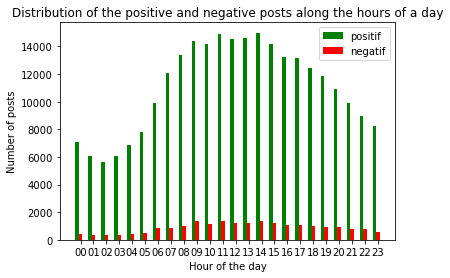

In [348]:
N = 24
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

hour_pos = body_pos.groupby(data_body['DATETIME2'].dt.hour).size()
rects1 = ax.bar(ind, hour_pos, width, color='g')
hour_neg = body_neg.groupby(data_body['DATETIME2'].dt.hour).size()
rects2 = ax.bar(ind+width, hour_neg, width, color='r')

ax.set_ylabel('Number of posts')
ax.set_xlabel('Hour of the day')
ax.set_title('Distribution of the positive and negative posts along the hours of a day')
ax.set_xticks(ind+width)
ax.set_xticklabels(('00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'))
ax.legend((rects1[0], rects2[0]), ('positif', 'negatif'))

plt.show()

**Analysis :**
- Seems to have smaller number of posts during night and a lot during the afternoon. Quite logical. Positive and negatives posts seams to have quite the same evolution, need to compute the ratio to show it more clearly.

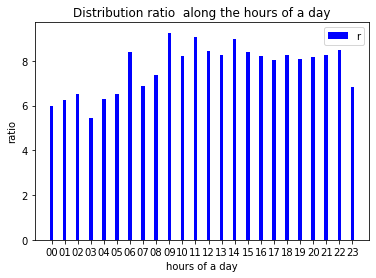

In [351]:
ratio = [(int(b) / int(m))*100 for b,m in zip(hour_neg, hour_pos)]
N = 24
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, ratio, width, color='b')

ax.set_ylabel('ratio')
ax.set_xlabel('hours of a day')
ax.set_title('Distribution ratio  along the hours of a day')
ax.set_xticks(ind)
ax.set_xticklabels(('00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'))
ax.legend('ratio')
plt.show()

- we can identify three part : low ration (5-7) for 00, 01, 02, 03, 04, 05, 07, 23 ; middle ratio (8) for 06, 10, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22 and high ratio (9) for 09, 11 and 14

- need to find a relevent hour for each of these parts


In [356]:
# ratio 5-7 
mean_r57_pos = statistics.mean([hour_pos.iloc[0], hour_pos.iloc[1], hour_pos.iloc[2], hour_pos.iloc[3], hour_pos.iloc[4], hour_pos.iloc[5], hour_pos.iloc[7], hour_pos.iloc[23]])
print('The mean count of posts from jan. to apr. is ', mean_r57_pos)
print('The difference between number of counts and mean for march and april is respectively: \n',[abs(x - mean_r57_pos) for x in[hour_pos.iloc[0], hour_pos.iloc[1], hour_pos.iloc[2], hour_pos.iloc[3], hour_pos.iloc[4], hour_pos.iloc[5], hour_pos.iloc[7], hour_pos.iloc[23]]])


The mean count of posts from jan. to apr. is  7481
The difference between number of counts and mean for march and april is respectively: 
 [392, 1436, 1847, 1381, 614, 338, 4588, 744]


- the more representative for the ratio 5-7 is 7h 

In [354]:
# ratio 8
mean_r8_pos = statistics.mean([hour_pos.iloc[6], hour_pos.iloc[10], hour_pos.iloc[12], hour_pos.iloc[13], hour_pos.iloc[15], hour_pos.iloc[16], hour_pos.iloc[17], hour_pos.iloc[18], hour_pos.iloc[19], hour_pos.iloc[20], hour_pos.iloc[21], hour_pos.iloc[22]])
print('The mean count of posts from jan. to apr. is ', mean_r8_pos)
print('The difference between number of counts and mean for march and april is respectively: \n',[abs(x - mean_r8_pos) for x in [hour_pos.iloc[6], hour_pos.iloc[10], hour_pos.iloc[12], hour_pos.iloc[13], hour_pos.iloc[15], hour_pos.iloc[16], hour_pos.iloc[17], hour_pos.iloc[18], hour_pos.iloc[19], hour_pos.iloc[20], hour_pos.iloc[21], hour_pos.iloc[22]]])

The mean count of posts from jan. to apr. is  12330
The difference between number of counts and mean for march and april is respectively: 
 [2392, 1859, 2241, 2287, 1819, 937, 837, 88, 441, 1405, 2430, 3396]


- the most representative is 18h

In [355]:
# ratio 9
mean_r9_pos = statistics.mean([hour_pos.iloc[9], hour_pos.iloc[11], hour_pos.iloc[14]])
print('The mean count of posts from jan. to apr. is ', mean_r9_pos)
print('The difference between number of counts and mean for march and april is respectively: \n',[abs(x - mean_r9_pos) for x in [hour_pos.iloc[9], hour_pos.iloc[11], hour_pos.iloc[14]]])

The mean count of posts from jan. to apr. is  14769
The difference between number of counts and mean for march and april is respectively: 
 [343, 118, 225]


- the most representative is 12h

**Ccl :** In order to assess the impact of the **HOUR** on the structure of the network, we can compare  3 subgraphs : 
> - from 7h (representative of the first group - ratio 5-7 -)
> - from 18h (representative of the second group, -ratio 8-)
> - from 12h (representative of the third group, -ration 9-)

## 2) Do the structural analysis of these subgraphs 

 ## 3) First conclusion

## 4) Work on the wikipedia and slashdot dataset

### **Step 0**  : Work with datetime data

load the wikipedia dataset 

In [181]:
Wikipedia_raw = open("Data/wikiElec.ElecBs3.txt", mode='rt', encoding="utf-8", errors="ignore")
mylines=[] #temporary set of the raw wikipedia lines 

for line in Wikipedia_raw:
    mylines.append(line)

In [182]:
mylines[15]

'V\t1\t7\t2004-09-14 19:37:00\ttexture\n'

In [195]:
# Organisation Wikipedia data set (cont.)

#Process mylines to organize information in a dataframe
Wiki_votes= pd.DataFrame()
for i in range(6, 128015): #128015 corresponds to the final index of the file 
    if mylines[i][0] == "U": # Case of a new candidate
        line_d = mylines[i].split("\t")
        dest = line_d[1] # dest : Candidate ID
        j = 2
        while mylines[i+j][0] == "V" and (i+j)<=len(mylines):
            line_v = mylines[i+j].split("\t") #split the line
            line_v.append(dest) # add the candidate ID information and the date of vote
            Vv = pd.DataFrame(np.array([line_v]))
            Wiki_votes = Wiki_votes.append(Vv, ignore_index=True) # add the new vote to the DataFrame containing all the votes
            j += 1

In [198]:
Wiki_votes.columns =['V', 'Sign','ID_voter','Date', 'Name_voter', 'ID_candidate']
Wiki_votes = Wiki_votes.drop(['V', 'Name_voter'], axis=1)
Wiki_votes = Wiki_votes.reindex(columns = ['ID_voter', 'ID_candidate', 'Sign', 'Date'])
Wiki_votes.head()

,ID_voter,ID_candidate,Sign,Date
0,3,30,1,2004-09-14 16:26:00
1,25,30,-1,2004-09-14 16:53:00
2,4,30,1,2004-09-14 17:08:00
3,5,30,1,2004-09-14 17:37:00
4,6,30,1,2004-09-14 19:28:00


check the type of the data

In [199]:
print('Exemple : the date of the first post of the dataset is : {}'.format(Wiki_votes['Date'][3]))
print(' Its type is ',type(Wiki_votes['Date'][3]))

Exemple : the date of the first post of the dataset is : 2004-09-14 17:37:00
 Its type is  <class 'str'>


So we need to convert, as for reddit

In [206]:
Wiki_votes['DATETIME'] = pd.to_datetime(Wiki_votes['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
Wiki_votes.head()

,ID_voter,ID_candidate,Sign,Date,DATETIME
0,3,30,1,2004-09-14 16:26:00,2004-09-14 16:26:00
1,25,30,-1,2004-09-14 16:53:00,2004-09-14 16:53:00
2,4,30,1,2004-09-14 17:08:00,2004-09-14 17:08:00
3,5,30,1,2004-09-14 17:37:00,2004-09-14 17:37:00
4,6,30,1,2004-09-14 19:28:00,2004-09-14 19:28:00


In [314]:
print('Exemple : the date of the first post of the dataset is : {}'.format(Wiki_votes['DATETIME'][3]))
print(' Its type is ',type(Wiki_votes['DATETIME'][3]))

Exemple : the date of the first post of the dataset is : 2004-09-14 17:37:00
 Its type is  <class 'pandas._libs.tslibs.timestamps.Timestamp'>


split into positive and negative dataset

*Positive*

In [281]:
wiki_pos = Wiki_votes.copy()
wiki_pos = wiki_pos.drop(wiki_pos[wiki_pos.Sign == '-1'].index).reset_index(drop=True)
wiki_pos = wiki_pos.drop(wiki_pos[wiki_pos.Sign == '0'].index).reset_index(drop=True)
print('data body original .{}'.format(Wiki_votes.shape))
print('body POS {}'.format(wiki_pos.shape))

data body original .(114040, 5)
body POS (83962, 5)


In [282]:
wiki_pos.head()

,ID_voter,ID_candidate,Sign,Date,DATETIME
0,3,30,1,2004-09-14 16:26:00,2004-09-14 16:26:00
1,4,30,1,2004-09-14 17:08:00,2004-09-14 17:08:00
2,5,30,1,2004-09-14 17:37:00,2004-09-14 17:37:00
3,6,30,1,2004-09-14 19:28:00,2004-09-14 19:28:00
4,7,30,1,2004-09-14 19:37:00,2004-09-14 19:37:00


In [283]:
# check 
print('In data wiki votes : sign of post 1 = ', Wiki_votes['Sign'][1])
print('In wiki pos : sign of post 4 = ', wiki_pos['Sign'][1])

In data wiki votes : sign of post 1 =  -1
In wiki pos : sign of post 4 =  1


*Negative*

In [284]:
wiki_neg = Wiki_votes.copy()
wiki_neg = wiki_neg.drop(wiki_neg[wiki_neg.Sign == '1'].index).reset_index(drop=True)
wiki_neg = wiki_neg.drop(wiki_neg[wiki_neg.Sign == '0'].index).reset_index(drop=True)
print('data body original .{}'.format(Wiki_votes.shape))
print('body POS {}'.format(wiki_neg.shape))


data body original .(114040, 5)
body POS (23118, 5)


In [285]:
wiki_neg.head()

,ID_voter,ID_candidate,Sign,Date,DATETIME
0,25,30,-1,2004-09-14 16:53:00,2004-09-14 16:53:00
1,25,6,-1,2004-09-12 03:46:00,2004-09-12 03:46:00
2,4,8,-1,2004-09-14 22:25:00,2004-09-14 22:25:00
3,12,8,-1,2004-09-15 06:38:00,2004-09-15 06:38:00
4,78,8,-1,2004-09-15 19:25:00,2004-09-15 19:25:00


In [287]:
# check 
print('In data wiki votes : sign of post 1 = ', Wiki_votes['Sign'][0])
print('In wiki pos : sign of post 4 = ', wiki_neg['Sign'][0])

In data wiki votes : sign of post 1 =  1
In wiki pos : sign of post 4 =  -1


#### Step 1 : Analysis of the year 

In [297]:
# Just to have an idea of what it'll look like. 
year_positive_wiki = wiki_pos.groupby(wiki_pos['DATETIME'].dt.year).size()
year_negative_wiki = wiki_neg.groupby(wiki_neg['DATETIME'].dt.year).size()

print('Year Positive', year_positive_wiki)
print('Year Negative', year_negative_wiki)

Year Positive DATETIME
2004     3544
2005    21188
2006    44588
2007    14631
2061        2
2063        1
2064        1
2065        1
2067        1
2070        1
2074        1
2086        1
2096        1
2105        1
dtype: int64
Year Negative DATETIME
2004     3544
2005    19552
2006       18
2007        2
2086        1
2096        1
dtype: int64


In [303]:
print(wiki_pos[wiki_pos['DATETIME'].dt.year == 2063])

      ID_voter ID_candidate Sign                 Date            DATETIME
49060     4963         5092    1  2063-01-22 01:04:00 2063-01-22 01:04:00


Here we see that some of the year are not understandable as 2063. Thus we will filter the dataset to remove all the impossible years. 

In [310]:
wiki_neg = wiki_neg.drop(wiki_neg[wiki_neg['DATETIME'].dt.year > 2020].index).reset_index(drop=True)
wiki_pos = wiki_pos.drop(wiki_pos[wiki_pos['DATETIME'].dt.year > 2020].index).reset_index(drop=True)

In [311]:
print(wiki_pos[wiki_pos['DATETIME'].dt.year == 2063])

Empty DataFrame
Columns: [ID_voter, ID_candidate, Sign, Date, DATETIME]
Index: []


In [313]:
# Check again the year distribution 
year_positive_wiki = wiki_pos.groupby(wiki_pos['DATETIME'].dt.year).size()
year_negative_wiki = wiki_neg.groupby(wiki_neg['DATETIME'].dt.year).size()

print('Year Positive', year_positive_wiki)
print('Year Negative', year_negative_wiki)

Year Positive DATETIME
2004     2569
2005    17057
2006    31915
2007    31903
2008      509
dtype: int64
Year Negative DATETIME
2004     748
2005    3161
2006    9806
2007    9294
2008     109
dtype: int64


So years represented are from 2004 to 2008. 

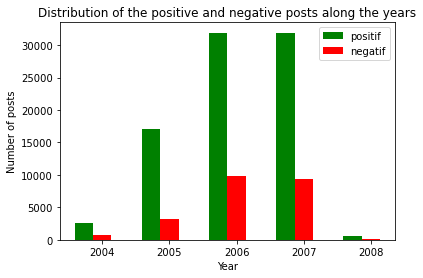

In [315]:
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

 
year_pos_wiki = wiki_pos.groupby(wiki_pos['DATETIME'].dt.year).size()
rects1 = ax.bar(ind, year_pos_wiki, width, color='g')
year_neg_wiki = wiki_neg.groupby(wiki_neg['DATETIME'].dt.year).size()
rects2 = ax.bar(ind+width, year_neg_wiki, width, color='r')

ax.set_ylabel('Number of posts')
ax.set_xlabel('Year')
ax.set_title('Distribution of the positive and negative posts along the years')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('2004', '2005', '2006', '2007', '2008'))
ax.legend((rects1[0], rects2[0]), ('positif', 'negatif'))

plt.show()

**Analysis :**
- So here both the amount of positive votes is higher than the negative ones, but both seams to have the same evolution along the year. We have to compute the ratio to make sure. 

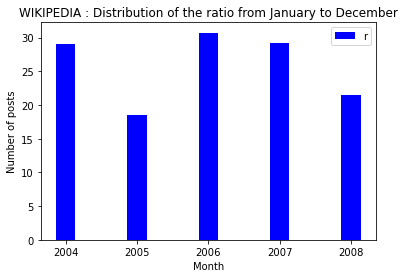

In [358]:
ratio_wiki = [(int(b) / int(m))*100 for b,m in zip(year_neg_wiki, year_pos_wiki)]
N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)


rects1 = ax.bar(ind, ratio_wiki, width, color='b')
ax.set_ylabel('Number of posts')
ax.set_xlabel('Month')
ax.set_title('WIKIPEDIA : Distribution of the ratio from January to December')
ax.set_xticks(ind)
ax.set_xticklabels( ('2004', '2005', '2006', '2007', '2008'))
ax.legend('ratio neg/pos*100')

plt.show()

- so in 2005 the ratio neg/pos*100 is smaller than in 2006 and 2007. We can see on the previous graph that between 2004 and 2007 there is a huge increase of positive votes. 
- as we want to compare two different subgraphs based on year analysis, it is more intersting to take 2005 and 2007 as 2004 and 2007 have quite the same ratio (thus 2007 is an enlargement of the situation in 2004). 

**Ccl :** In order to assess the impact of the **HOUR** on the structure of the network, we can compare  3 subgraphs : 
> - from 2005 (representative of the first group - ratio  15-20- )
> - from 2007 (representative of the second group, -ratio 25-30-)
> - from 2008 (representative of the third group, -ration 20-25-)

#### Step 2 : Analysis of the month 

In [359]:
month_positive_wiki = wiki_pos.groupby(wiki_pos['DATETIME'].dt.month).size()
month_negative_wiki = wiki_neg.groupby(wiki_neg['DATETIME'].dt.month).size()
print('Month Positive', month_positive_wiki)
print('Month Negative', month_negative_wiki)

Month Positive DATETIME
1     6610
2     5815
3     6766
4     6477
5     7760
6     6893
7     6438
8     5989
9     6353
10    8610
11    8748
12    7494
dtype: int64
Month Negative DATETIME
1     2006
2     1605
3     1894
4     1857
5     2272
6     1830
7     2134
8     1818
9     1817
10    2279
11    1602
12    2004
dtype: int64


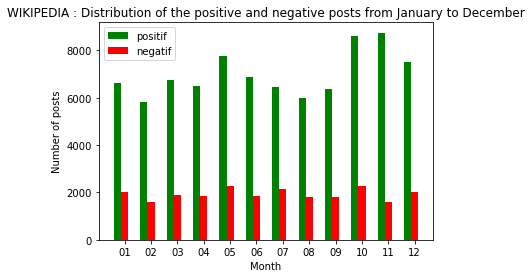

In [361]:
N = 12
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

 
month_pos_wiki = wiki_pos.groupby(wiki_pos['DATETIME'].dt.month).size()
rects1 = ax.bar(ind, month_pos_wiki, width, color='g')
month_neg_wiki = wiki_neg.groupby(wiki_neg['DATETIME'].dt.month).size()
rects2 = ax.bar(ind+width, month_neg_wiki, width, color='r')

ax.set_ylabel('Number of posts')
ax.set_xlabel('Month')
ax.set_title('WIKIPEDIA : Distribution of the positive and negative posts from January to December')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'))
ax.legend( (rects1[0], rects2[0]), ('positif', 'negatif') )

plt.show()

**Analysis :**
- hard to see if pos and neg have the same trend, need to compute the ratio

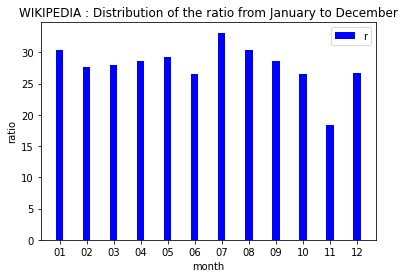

In [362]:
ratio_w = [(int(b) / int(m))*100 for b,m in zip(month_neg_wiki, month_pos_wiki)]
N = 12
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)


rects1 = ax.bar(ind, ratio_w, width, color='b')
ax.set_ylabel('ratio')
ax.set_xlabel('month')
ax.set_title('WIKIPEDIA : Distribution of the ratio from January to December')
ax.set_xticks(ind)
ax.set_xticklabels( ('01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'))
ax.legend('ratio neg/pos*100')

plt.show()

- three parts : small ratio : month 11, high ratio : month 7, middle ratio : month 1-2-3-4-5-6-8-9-10-12
- we have to find the more representative month for middle ratio

In [365]:
# ratio middle
mean_middle_pos = statistics.mean([month_pos_wiki.iloc[0], month_pos_wiki.iloc[1], month_pos_wiki.iloc[2], month_pos_wiki.iloc[3], month_pos_wiki.iloc[4], month_pos_wiki.iloc[5], month_pos_wiki.iloc[7], month_pos_wiki.iloc[10], month_pos_wiki.iloc[11]])
print('The mean count of posts from jan. to apr. is ', mean_middle_pos)
print('The difference between number of counts and mean for march and april is respectively: \n',[abs(x - mean_middle_pos) for x in[month_pos_wiki.iloc[0], month_pos_wiki.iloc[1], month_pos_wiki.iloc[2], month_pos_wiki.iloc[3], month_pos_wiki.iloc[4], month_pos_wiki.iloc[5], month_pos_wiki.iloc[7], month_pos_wiki.iloc[10], month_pos_wiki.iloc[11]]])

The mean count of posts from jan. to apr. is  6950
The difference between number of counts and mean for march and april is respectively: 
 [340, 1135, 184, 473, 810, 57, 961, 1798, 544]


- more representative for the middle ratio is june (06) because the difference with the average value is the smaller. 

**Ccl :** In order to assess the impact of the **MONTH** on the structure of the network, we can compare  3 subgraphs : 
> - from novembre (11) (representative of the first group - low ratio < 20- )
> - from july (07) (representative of the second group, -high ratio > 30-)
> - from june (06) (representative of the third group, -middle ratio around 25-)

#### Step 3 :  Analysis of the day 

In [372]:
day_positive_wiki = wiki_pos.groupby(wiki_pos['DATETIME'].dt.day).size()
day_negative_wiki = wiki_neg.groupby(wiki_neg['DATETIME'].dt.day).size()
print('Month Positive', day_positive_wiki)
print('Month Negative', day_negative_wiki)

Month Positive DATETIME
1     3056
2     2906
3     2962
4     3107
5     3325
6     2930
7     2987
8     2934
9     2801
10    3194
11    2921
12    2772
13    2777
14    2790
15    2690
16    2643
17    2521
18    2509
19    2418
20    2569
21    2486
22    2686
23    2742
24    2754
25    2343
26    2504
27    2392
28    2669
29    2252
30    2479
31    1834
dtype: int64
Month Negative DATETIME
1     845
2     915
3     851
4     825
5     789
6     860
7     800
8     808
9     842
10    795
11    701
12    693
13    761
14    621
15    608
16    732
17    667
18    699
19    634
20    643
21    726
22    763
23    854
24    755
25    650
26    672
27    696
28    733
29    839
30    781
31    560
dtype: int64


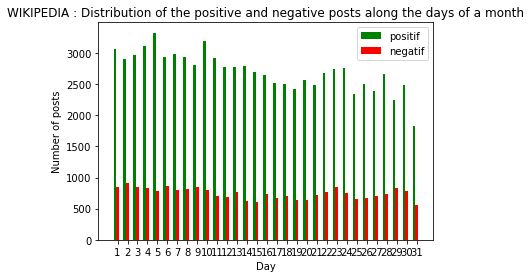

In [375]:
N = 31
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

 
day_pos_wiki = wiki_pos.groupby(wiki_pos['DATETIME'].dt.day).size()
rects1 = ax.bar(ind, day_pos_wiki, width, color='g')
day_neg_wiki = wiki_neg.groupby(wiki_neg['DATETIME'].dt.day).size()
rects2 = ax.bar(ind+width, day_neg_wiki, width, color='r')

ax.set_ylabel('Number of posts')
ax.set_xlabel('Day')
ax.set_title('WIKIPEDIA : Distribution of the positive and negative posts along the days of a month')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26' ,'27', '28', '29', '30', '31'))
ax.legend((rects1[0], rects2[0]), ('positif', 'negatif'))

plt.show()

**Analysis :**
- compared to other graph, color red very present, it means that the ratio will probably be higher with this observation according to the day of the month 
- need to compute the ration to see overall trend

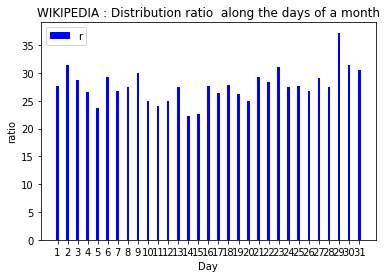

In [377]:
ratio_w = [(int(b) / int(m))*100 for b,m in zip(day_neg_wiki, day_pos_wiki)]
N = 31
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, ratio_w, width, color='b')

ax.set_ylabel('ratio')
ax.set_xlabel('Day')
ax.set_title('WIKIPEDIA : Distribution ratio  along the days of a month')
ax.set_xticks(ind)
ax.set_xticklabels( ('1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26' ,'27', '28', '29', '30', '31'))
ax.legend('ratio')
plt.show()

- as for Reddit, the approach look at the day in a month not very clear, we focus on day of the week

In [378]:
day_positive_wiki = wiki_pos.groupby(wiki_pos['DATETIME'].dt.weekday).size()
day_negative_wiki = wiki_neg.groupby(wiki_neg['DATETIME'].dt.weekday).size()
print('Month Positive', day_positive_wiki)
print('Month Negative', day_negative_wiki)

Month Positive DATETIME
0    12181
1    13259
2    12409
3    12257
4    12252
5    11081
6    10514
dtype: int64
Month Negative DATETIME
0    3203
1    3513
2    3353
3    3488
4    3602
5    2827
6    3132
dtype: int64


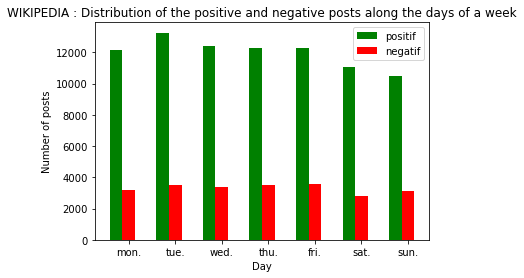

In [379]:
N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

 
dayw_pos_wiki = wiki_pos.groupby(wiki_pos['DATETIME'].dt.weekday).size()
rects1 = ax.bar(ind, dayw_pos_wiki, width, color='g')
dayw_neg_wiki = wiki_neg.groupby(wiki_neg['DATETIME'].dt.weekday).size()
rects2 = ax.bar(ind+width, dayw_neg_wiki, width, color='r')

ax.set_ylabel('Number of posts')
ax.set_xlabel('Day')
ax.set_title('WIKIPEDIA : Distribution of the positive and negative posts along the days of a week')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('mon.', 'tue.', 'wed.', 'thu.', 'fri.', 'sat.', 'sun.'))
ax.legend((rects1[0], rects2[0]), ('positif', 'negatif'))

plt.show()

- As to compute the ratio

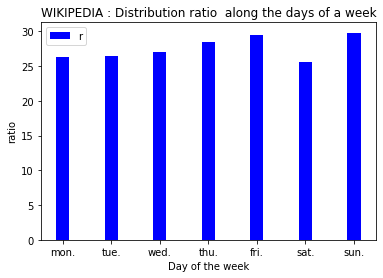

In [385]:
ratio_w = [(int(b) / int(m))*100 for b,m in zip(dayw_neg_wiki, dayw_pos_wiki)]
N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, ratio_w, width, color='b')

ax.set_ylabel('ratio')
ax.set_xlabel('Day of the week')
ax.set_title('WIKIPEDIA : Distribution ratio  along the days of a week')
ax.set_xticks(ind)
ax.set_xticklabels( ('mon.', 'tue.', 'wed.', 'thu.', 'fri.', 'sat.', 'sun.'))
ax.legend('ratio')
plt.show()

- increase during the work week (monday to friday) and different from saturday to sunday. Saturday looks like the beginning of the week while sunday looks like friday
- so we will focus on the extrem : monday and friday

**Ccl :** In order to assess the impact of the **MONTH** on the structure of the network, we can compare  3 subgraphs : 
> - from monday 
> - from friday

#### Step 4 : Analysis of the hour 

In [384]:
hour_positive_wiki = wiki_pos.groupby(wiki_pos['DATETIME'].dt.hour).size()
hour_negative_wiki = wiki_neg.groupby(wiki_neg['DATETIME'].dt.hour).size()
print('Month Positive', hour_positive_wiki)
print('Month Negative', hour_negative_wiki)

Month Positive DATETIME
0     4784
1     4417
2     4196
3     3879
4     3597
5     3196
6     2821
7     2507
8     2400
9     2073
10    2290
11    2421
12    2539
13    2877
14    3215
15    3585
16    3784
17    3978
18    4067
19    3939
20    4144
21    4574
22    4313
23    4357
dtype: int64
Month Negative DATETIME
0     1273
1     1173
2     1149
3     1081
4      952
5      913
6      767
7      713
8      595
9      544
10     555
11     548
12     686
13     778
14     887
15    1040
16    1047
17    1157
18    1183
19    1093
20    1175
21    1270
22    1302
23    1237
dtype: int64


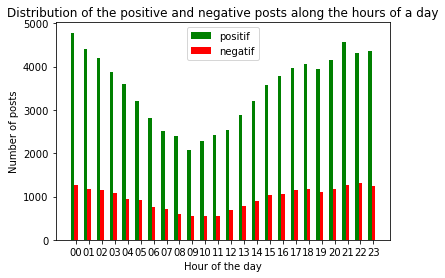

In [387]:
N = 24
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

hour_pos_wiki = wiki_pos.groupby(wiki_pos['DATETIME'].dt.hour).size()
rects1 = ax.bar(ind, hour_pos_wiki, width, color='g')
hour_neg_wiki = wiki_neg.groupby(wiki_neg['DATETIME'].dt.hour).size()
rects2 = ax.bar(ind+width, hour_neg_wiki, width, color='r')

ax.set_ylabel('Number of posts')
ax.set_xlabel('Hour of the day')
ax.set_title('Distribution of the positive and negative posts along the hours of a day')
ax.set_xticks(ind+width)
ax.set_xticklabels(('00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'))
ax.legend((rects1[0], rects2[0]), ('positif', 'negatif'))

plt.show()

**Analysis :**
- crazy trend :) It is to have very less vote at morning - mid day then during night ... (is it because of jetlag somehow??)
- both positive and negative seams to have the same trend, but positive seams to be more marked. Compute the ratio to check

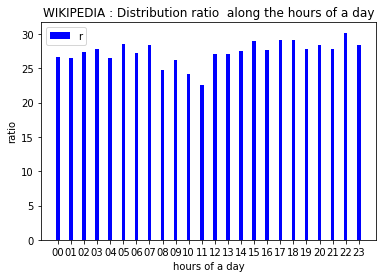

In [390]:
ratio_ww = [(int(b) / int(m))*100 for b,m in zip(hour_neg_wiki, hour_pos_wiki)]
N = 24
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

rects1 = ax.bar(ind, ratio_ww, width, color='b')

ax.set_ylabel('ratio')
ax.set_xlabel('hours of a day')
ax.set_title('WIKIPEDIA : Distribution ratio  along the hours of a day')
ax.set_xticks(ind)
ax.set_xticklabels(('00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'))
ax.legend('ratio')
plt.show()

- kind of loosing the previous trend : so both positve and negative where behaving quite similar
- here 2 parts : low ratio (around morning : 8, 10, 11 and then middle one (00, 01, 02, 03, 04, 05, 06, 07, 09, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)

In [391]:
# ratio low 
mean_rlow_pos = statistics.mean([hour_pos.iloc[8], hour_pos.iloc[10], hour_pos.iloc[11]])
print('The mean count of posts from jan. to apr. is ', mean_rlow_pos)
print('The difference between number of counts and mean for march and april is respectively: \n',[abs(x - mean_rlow_pos) for x in[hour_pos.iloc[8], hour_pos.iloc[10], hour_pos.iloc[11]]])


The mean count of posts from jan. to apr. is  14149
The difference between number of counts and mean for march and april is respectively: 
 [777, 40, 738]


- 10h is representative of low ratio

In [395]:
# ratio middle 
mean_rmiddle_pos = statistics.mean([hour_pos.iloc[0], hour_pos.iloc[1], hour_pos.iloc[2], hour_pos.iloc[3], hour_pos.iloc[4], hour_pos.iloc[5], hour_pos.iloc[6], hour_pos.iloc[7], hour_pos.iloc[9], hour_pos.iloc[12], hour_pos.iloc[13], hour_pos.iloc[14], hour_pos.iloc[15], hour_pos.iloc[16], hour_pos.iloc[17], hour_pos.iloc[18], hour_pos.iloc[19], hour_pos.iloc[20], hour_pos.iloc[21], hour_pos.iloc[22], hour_pos.iloc[23]])
print('The mean count of posts from jan. to apr. is ', mean_rmiddle_pos)
print('The difference between number of counts and mean for march and april is respectively: \n',[abs(x - mean_rmiddle_pos) for x in[hour_pos.iloc[0], hour_pos.iloc[1], hour_pos.iloc[2], hour_pos.iloc[3], hour_pos.iloc[4], hour_pos.iloc[5], hour_pos.iloc[6], hour_pos.iloc[7], hour_pos.iloc[9], hour_pos.iloc[12], hour_pos.iloc[13], hour_pos.iloc[14], hour_pos.iloc[15], hour_pos.iloc[16], hour_pos.iloc[17], hour_pos.iloc[18], hour_pos.iloc[19], hour_pos.iloc[20], hour_pos.iloc[21], hour_pos.iloc[22], hour_pos.iloc[23]]])


The mean count of posts from jan. to apr. is  10621
The difference between number of counts and mean for march and april is respectively: 
 [3532, 4576, 4987, 4521, 3754, 2802, 683, 1448, 3805, 3950, 3996, 4373, 3528, 2646, 2546, 1797, 1268, 304, 721, 1687, 2396]


- 6h is representative of the middle ratio

**Ccl :** In order to assess the impact of the **MONTH** on the structure of the network, we can compare  3 subgraphs : 
> - from 10h 
> - from 6h

## General question -----------------------------------------------------------------------------------------------

Do you agree to define the subsets according to the ratio or do you want to divid the subsets according to the size of the sample (so the number of posts-votes for a given day/hour/year)? 

## ---------------------------------------------------------------------------------------------------------------------------